In [13]:
%matplotlib inline

In [14]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit import Parameters, Minimizer, minimize, report_fit

import scqubits as scq

In [21]:
def func(pars, x, data=None):
    a, b = pars['a'], pars['b']
    transmon = scq.Transmon(EJ = 30.02,
                            EC = a,
                            ng = b,
                            ncut = 31)
    specdata = transmon.get_spectrum_vs_paramvals('EJ',
                                                  x,
                                                  evals_count = 4,
                                                  subtract_ground = True)
    model = specdata.energy_table
    if data is None:
        return model
    return model - data


def f(var, x):
    transmon = scq.Transmon(EJ = 30.02,
                            EC = var[0],
                            ng = var[1],
                            ncut = 31)
    specdata = transmon.get_spectrum_vs_paramvals('EJ',
                                                  x,
                                                  evals_count = 4,
                                                  subtract_ground = True)
    return specdata.energy_table


params = Parameters()
params.add('a', value=5)
params.add('b', value=0, min = 0, max = 1)

a, b = 1.2, 0.3
x = np.linspace(0, 50, 50)
y = f([a, b], x)
data = y + 0.5*np.random.normal(size=y.shape)

# fit without analytic derivative
min1 = Minimizer(func, params, fcn_args=(x,), fcn_kws={'data': data})
out1 = min1.leastsq()
report_fit(out1.params)
fit1 = func(out1.params, x)

out2 = minimize(func, params, args=(x, data))
fit2 = func(out2.params, x)
report_fit(out2.params)

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

[[Variables]]
    a:  1.18379448 +/- 0.00397908 (0.34%) (init = 5)
    b:  0.32047885 +/- 0.00853446 (2.66%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) =  0.280


In [16]:
print('''
"true" parameters are: a = %.3f, b = %.3f

==================================
Statistic/Parameter|   Without   |
----------------------------------
N Function Calls   |   %3i       |
Chi-square         |   %.4f    |
   a               |   %.4f    |
   b               |   %.4f    |
--------------------------------
''' % (a, b,
       out1.nfev,
       out1.chisqr,
       out1.params['a'],
       out1.params['b'], ))


"true" parameters are: a = 1.200, b = 0.300

Statistic/Parameter|   Without   |
----------------------------------
N Function Calls   |     7       |
Chi-square         |   50.6564    |
   a               |   1.1954    |
   b               |   0.3013    |
--------------------------------



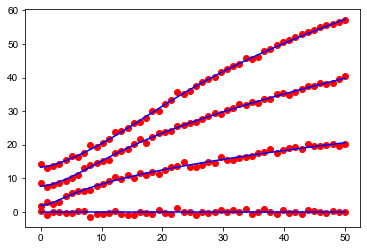

In [17]:
plt.plot(x, data, 'ro')
plt.plot(x, fit1, 'b')
plt.show()